## 1. Assesment on the KNN and NB theorems using the Cellphone file and having the below features. 

'''Independent variable:

battery_power - Total energy a battery can store in one time measured in mAh

blue          - Has bluetooth or not

clock_speed   - speed at which microprocessor executes instructions

dual_sim      - Has dual sim support or not

fc            - Front Camera mega pixels

four_g        - Has 4G or not

int_memory    - Internal Memory in Gigabytes

m_dep         - Mobile Depth in cm

mobile_wt     - Weight of mobile phone

n_cores       - Number of cores of processor

pc            - Primary Camera mega pixels

px_height     - Pixel Resolution Height

px_width      - Pixel Resolution Width

ram           - Random Access Memory in Mega Bytes

sc_h          - Screen Height of mobile in cm

sc_w          - Screen Width of mobile in cm

talk_time     - longest time that a single battery charge will last when you are

three_g       - Has 3G or not

touch_screen  - Has touch screen or not

wifi          - Has wifi or not


Dependent variable:
price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).''' 

In [1]:
import os 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
os.chdir(r"C:\Users\kalya\Santhosh\Data Science\Notebook\Preprocessing")

In [4]:
cp = pd.read_csv('Cellphone.csv')

In [8]:
cp.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [22]:
cp.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [18]:
cp[:5]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
cp.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
cp.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [13]:
cp.price_range[:10]

0    1
1    2
2    2
3    2
4    1
5    1
6    3
7    0
8    0
9    0
Name: price_range, dtype: int64

In [14]:
cp.shape

(2000, 21)

In [19]:
x = cp[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'n_cores', 'pc', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']]
y = cp['price_range']

In [25]:
print(x['blue'].value_counts())
print(x.shape)

0    1010
1     990
Name: blue, dtype: int64
(2000, 16)


In [27]:
print(y.value_counts())
print(y.shape)

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64
(2000,)


## I am using KNN theorem to predict the price_range of Cellphone 

In [53]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

([<matplotlib.axis.XTick at 0x22fd5bb3610>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

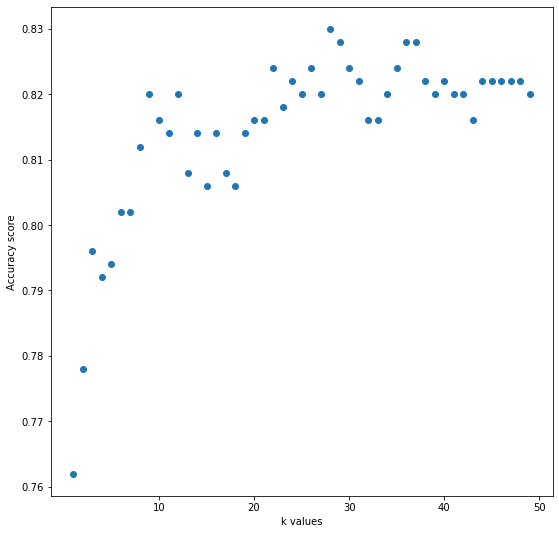

In [54]:
k_range = range(1,50)
score = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    score.append(knn.score(x_test, y_test))
    
plt.figure(figsize = (9, 9))
plt.xlabel('k values')
plt.ylabel('Accuracy score')
plt.scatter(k_range, score)
plt.xticks([10, 20, 30, 40, 50])

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier(n_neighbors = 30)

In [48]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [49]:
knn_score = knn.score(x_test, y_test)

In [50]:
knn_score

0.824

In [55]:
x[:5]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,2,2,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,3,6,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,5,6,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,6,9,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,2,14,1411,8,2,15,1,1,0


In [57]:
y[:5]

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [63]:
look_up_cp_range = {0:'low', 1:'medium', 2:'high'}
look_up_cp_range

{0: 'low', 1: 'medium', 2: 'high'}

In [65]:
cp_pred = knn.predict([[200,1, 4.5, 0, 5, 1, 20, 8, 30, 1000, 13, 6, 10, 0, 0, 1]])
look_up_cp_range[cp_pred[0]]

'low'

## I am using NB(Naive Bayes) theorem to predict the price_range of Cellphone 

In [69]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [70]:
model = GaussianNB()

In [71]:
model.fit(x1_train, y1_train)

GaussianNB()

In [72]:
y1_pred = model.predict(x1_test)

In [77]:
y1_pred[:5]

array([3, 0, 2, 1, 3], dtype=int64)

In [73]:
acc_score = accuracy_score(y1_test, y1_pred)

In [74]:
acc_score

0.7925

In [75]:
confusion_matrix(y1_test,y1_pred)

array([[ 85,  10,   0,   0],
       [ 10,  65,  17,   0],
       [  0,  17,  62,  20],
       [  0,   0,   9, 105]], dtype=int64)

In [76]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        95
           1       0.71      0.71      0.71        92
           2       0.70      0.63      0.66        99
           3       0.84      0.92      0.88       114

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



In [78]:
cp_pred1 = model.predict([[200,1, 4.5, 0, 5, 1, 20, 8, 30, 1000, 13, 6, 10, 0, 0, 1]])
look_up_cp_range[cp_pred1[0]]

'low'

## 2. Assesment on the KNN and NB theorems using the Fraud detectionf file and having the below features. 
#### step: represents a unit of time where 1 step equals 1 hour
#### type: type of online transaction
#### amount: the amount of the transaction
#### nameOrig: customer starting the transaction
#### oldbalanceOrg: balance before the transaction
#### newbalanceOrig: balance after the transaction
#### nameDest: recipient of the transaction
#### oldbalanceDest: initial balance of recipient before the transaction
#### newbalanceDest: the new balance of recipient after the transaction
#### isFraud: fraud transaction

In [81]:
fd = pd.read_csv('Fraud_Detection.csv')

In [82]:
fd.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,100165.000000,1.001650e+05,1.001650e+05,1.001650e+05,1.001650e+05,1.001650e+05,100165.000000
mean,8.502112,1.736458e+05,8.801756e+05,8.965348e+05,8.810839e+05,1.184639e+06,0.001158
std,1.825055,3.442910e+05,2.676095e+06,2.714232e+06,2.402387e+06,2.802252e+06,0.034011
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8.000000,9.970160e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,9.000000,5.285289e+04,2.008500e+04,0.000000e+00,2.091500e+04,5.048120e+04,0.000000
75%,10.000000,2.119434e+05,1.910560e+05,2.154246e+05,5.891912e+05,1.061043e+06,0.000000
max,10.000000,1.000000e+07,3.380000e+07,3.400000e+07,3.400000e+07,3.890000e+07,1.000000


In [84]:
fd.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [83]:
fd.step.value_counts()

9     37628
10    27439
8     21097
7      6837
1      2708
6      1660
2      1014
5       665
4       565
3       552
Name: step, dtype: int64

In [85]:
fd.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [86]:
fd.type.value_counts()

PAYMENT     39552
CASH_OUT    30772
CASH_IN     20248
TRANSFER     8603
DEBIT         990
Name: type, dtype: int64

In [94]:
fd.nameDest.value_counts()

C985934102     78
C1286084959    72
C248609774     71
C1590550415    69
C2083562754    66
               ..
M675397114      1
M535149585      1
M265570846      1
M148282983      1
C1699716440     1
Name: nameDest, Length: 51607, dtype: int64

In [88]:
fd['type'] = fd['type'].map({'PAYMENT':0,'CASH_OUT':1, 'CASH_IN':2, 'TRANSFER':3, 'DEBIT':4})

In [89]:
fd.type.value_counts().sort_values(ascending = True)

4      990
3     8603
2    20248
1    30772
0    39552
Name: type, dtype: int64

In [91]:
fd.shape

(100165, 10)

In [174]:
x_fd = fd[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

In [175]:
x_fd[:5]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,0,9839.64,170136.0,160296.36,0.0,0.0
1,1,0,1864.28,21249.0,19384.72,0.0,0.0
2,1,3,181.00,181.0,0.00,0.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0
4,1,0,11668.14,41554.0,29885.86,0.0,0.0


In [149]:
y_fd[:5]

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

## I am using KNN theorem to predict given transaction isFraud or not using fraud dection file 

In [176]:
x_fd_train, x_fd_test, y_fd_train, y_fd_test = train_test_split(x_fd, y_fd, random_state = 0)

([<matplotlib.axis.XTick at 0x22fdf34d640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

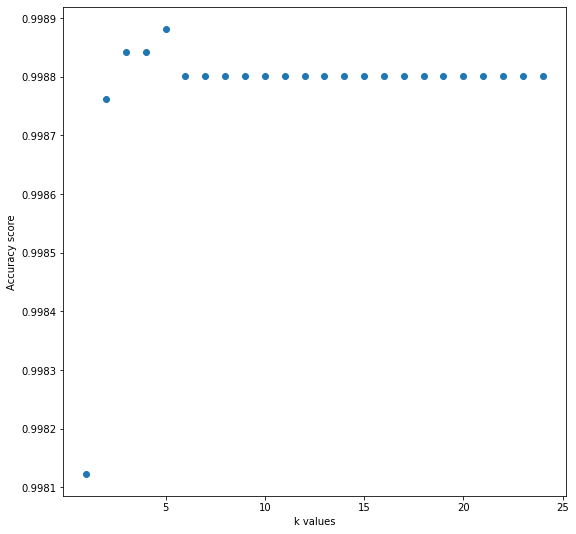

In [177]:
k_range = range(1,25)
score = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_fd_train, y_fd_train)
    score.append(knn.score(x_fd_test, y_fd_test))
    
plt.figure(figsize = (9, 9))
plt.xlabel('k values')
plt.ylabel('Accuracy score')
plt.scatter(k_range, score)
plt.xticks([5, 10, 15, 20, 25])

In [178]:
knn1 = KNeighborsClassifier(n_neighbors = 15)

In [179]:
knn1.fit(x_fd_train, y_fd_train)

KNeighborsClassifier(n_neighbors=15)

In [180]:
knn_score1 = knn1.score(x_fd_train, y_fd_train)
knn_score1

0.9988685222901109

In [181]:
x_fd_train[:5]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
98874,10,0,10810.70,620.00,0.0,0.00,0.00
8177,7,0,3445.22,266.00,0.0,0.00,0.00
73665,10,2,385627.90,39705.00,425332.9,190303.58,0.00
58464,9,1,232004.87,0.00,0.0,2226811.03,3036137.14
76536,10,0,14706.28,5789.64,0.0,0.00,0.00


In [182]:
fd[fd.isFraud == 0][:5]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,0,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,0,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
4,1,0,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0
5,1,0,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0
6,1,0,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0


In [183]:
fd[fd.isFraud == 1][:5]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,3,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
3,1,1,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
251,1,3,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
252,1,1,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
680,1,3,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [184]:
x_fd[:5]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,0,9839.64,170136.0,160296.36,0.0,0.0
1,1,0,1864.28,21249.0,19384.72,0.0,0.0
2,1,3,181.00,181.0,0.00,0.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0
4,1,0,11668.14,41554.0,29885.86,0.0,0.0


In [185]:
y_fd.value_counts()

0    100049
1       116
Name: isFraud, dtype: int64

In [186]:
look_up_fd_range = {0:'Not a Fraud transaction', 1:'Fraud Traction'}
look_up_fd_range


{0: 'Not a Fraud transaction', 1: 'Fraud Traction'}

In [193]:
fd_pred = knn1.predict([[15,2,-92806.0, -2806.0, 0.0, 0.0, 0.0]])
look_up_fd_range[fd_pred[0]]

'Not a Fraud transaction'

## I am using NB(Naive Bayes) theorem to predict given transaction isFraud or not using fraud dection file

In [ ]:
x1_fd_train, x1_fd_test, y1_fd_train, y1_fd_test = train_test_split(x_fd, y_fd, test_size = 0.2, random_state = 0)

model = GaussianNB()

model.fit(x1_fd_train, y1_fd_train)

y1_fd_pred = model.predict(x1_fd_test)

y1_fd_pred[:5]

acc_score = accuracy_score(y1_fd_test, y1_fd_pred)

acc_score

confusion_matrix(y1_fd_test,y1_fd_pred)

print(classification_report(y1_test, y1_pred))

cp_pred1 = model.predict([[200,1, 4.5, 0, 5, 1, 20, 8, 30, 1000, 13, 6, 10, 0, 0, 1]])
look_up_cp_range[cp_pred1[0]]

In [194]:
x1_fd_train, x1_fd_test, y1_fd_train, y1_fd_test = train_test_split(x_fd, y_fd, test_size = 0.2, random_state = 0)

In [196]:
model1 = GaussianNB()

In [197]:
model1.fit(x1_fd_train, y1_fd_train)

GaussianNB()

In [198]:
y1_fd_pred = model1.predict(x1_fd_test)

In [199]:
y1_fd_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [200]:
acc_score = accuracy_score(y1_fd_test, y1_fd_pred)

In [201]:
acc_score

0.9823291568911297

In [202]:
confusion_matrix(y1_fd_test,y1_fd_pred)

array([[19678,   328],
       [   26,     1]], dtype=int64)

In [203]:
print(classification_report(y1_fd_test, y1_fd_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     20006
           1       0.00      0.04      0.01        27

    accuracy                           0.98     20033
   macro avg       0.50      0.51      0.50     20033
weighted avg       1.00      0.98      0.99     20033



In [205]:
fd_pred1 = model1.predict([[1,0,1, -2806.0, 0.0, 0.0, 0.0]])
look_up_fd_range[fd_pred1[0]]

'Not a Fraud transaction'